In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [24]:
df=pd.read_csv('/content/drive/MyDrive/Sealevel.csv')
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


In [25]:
df["Year"]

0      1880
1      1881
2      1882
3      1883
4      1884
       ... 
129    2009
130    2010
131    2011
132    2012
133    2013
Name: Year, Length: 134, dtype: int64

In [26]:
df.describe()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


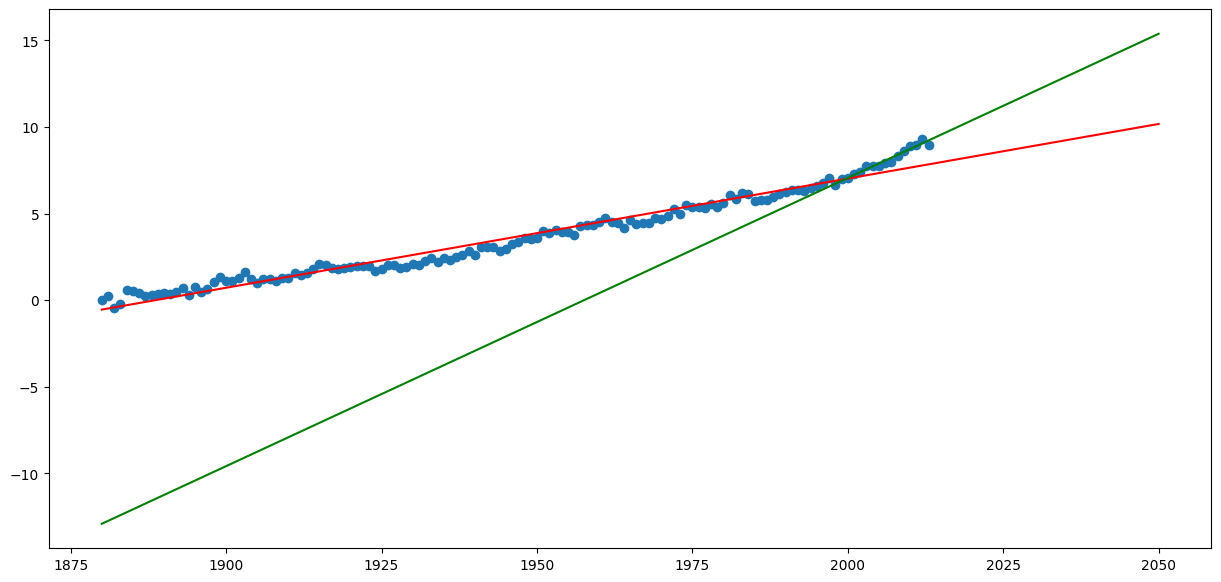

In [27]:
plt.figure(figsize=(15,7))
plt.scatter(df['Year'],df['CSIRO Adjusted Sea Level'])
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])
years_future = range(1880, 2051)
line_fit = slope * years_future + intercept
plt.plot(years_future, line_fit, color='red', label='Line of Best Fit (All Data)')
df_recent = df[df['Year'] >= 2000]
slope_recent, intercept_recent, _, _, _ = linregress(df_recent['Year'], df_recent['CSIRO Adjusted Sea Level'])
line_fit_recent = slope_recent * years_future + intercept_recent
plt.plot(years_future, line_fit_recent, color='green', label='Line of Best Fit (2000 Onward)')